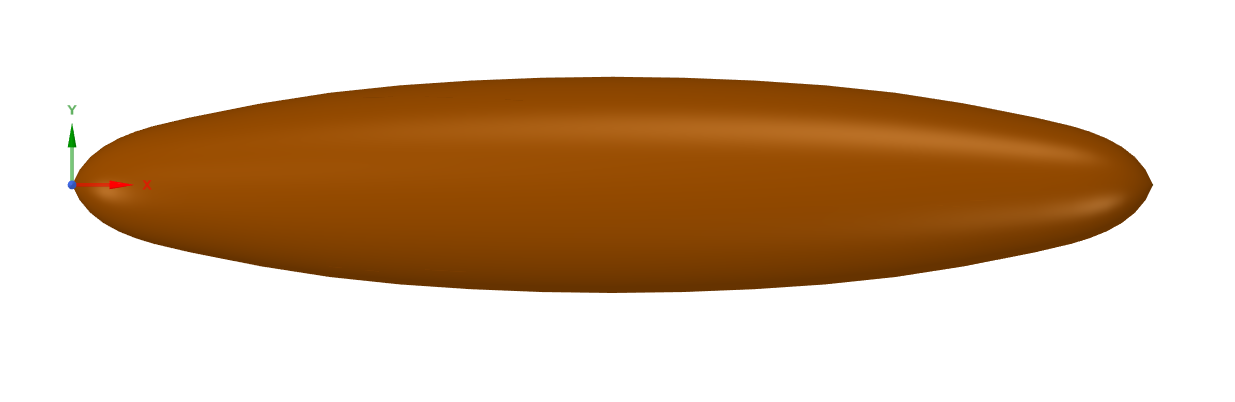

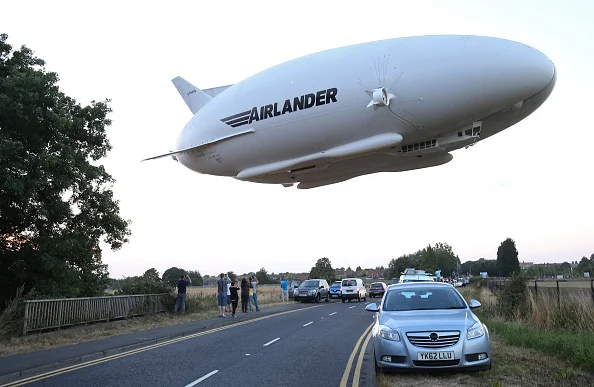

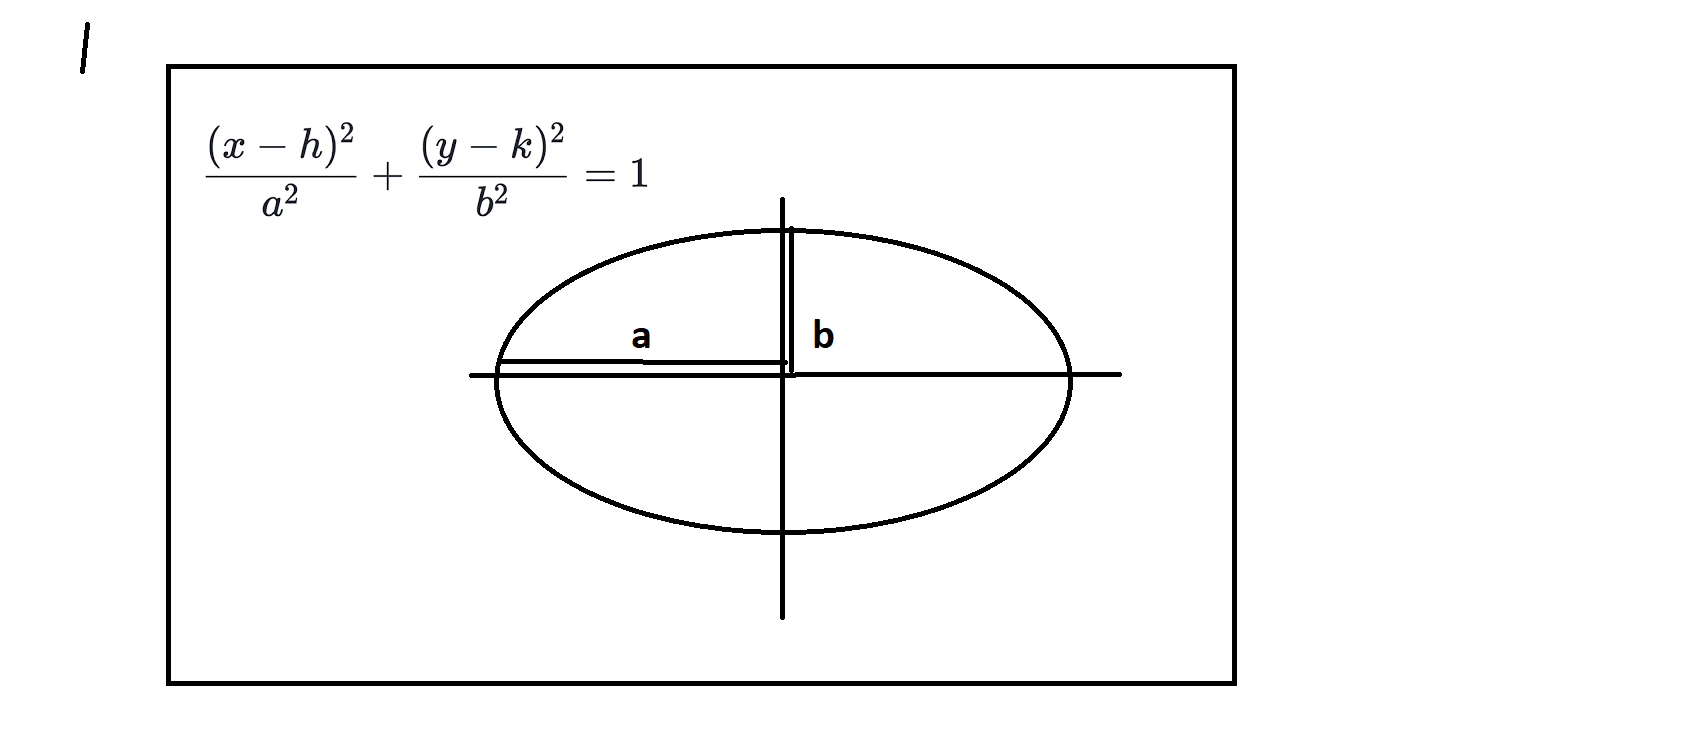

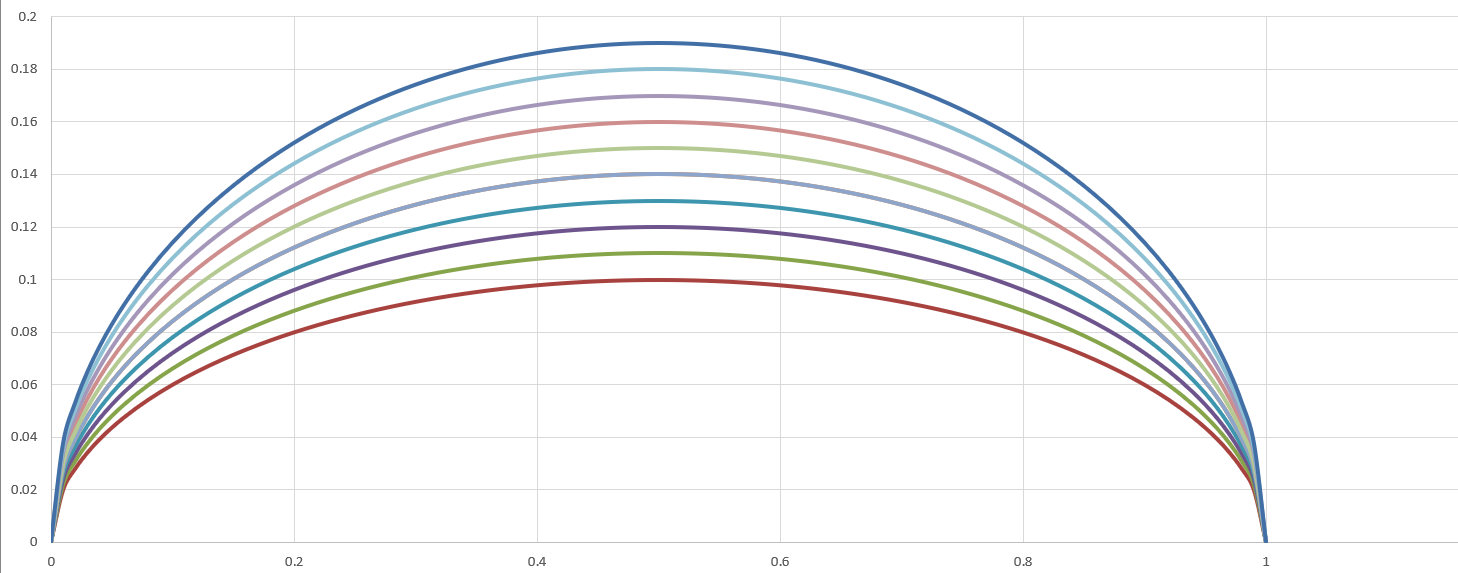

In [81]:
import numpy as np
import pandas as pd
  
# import the data required
data = pd.read_csv("MLA_File.csv")
print(data.head())

  shape    b  velocity  Force_coef
0   npl  0.1        10    0.003885
1   npl  0.1        10    0.004385
2   npl  0.1        10    0.004917
3   npl  0.1        10    0.005503
4   npl  0.1        10    0.006149


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [83]:

print(data['shape'].unique())

['npl' 'wang' 'ziyuan']


In [84]:
data['shape'].value_counts()

npl       100
wang      100
ziyuan    100
Name: shape, dtype: int64

In [85]:
merged = pd.get_dummies(data, columns = ['shape'])
merged

,b,velocity,Force_coef,shape_npl,shape_wang,shape_ziyuan
0,0.10,10,0.003885,1,0,0
1,0.10,10,0.004385,1,0,0
2,0.10,10,0.004917,1,0,0
3,0.10,10,0.005503,1,0,0
4,0.10,10,0.006149,1,0,0
...,...,...,...,...,...,...
295,0.19,100,0.018086,0,0,1
296,0.19,100,0.019590,0,0,1
297,0.19,100,0.021740,0,0,1
298,0.19,100,0.024411,0,0,1


In [86]:
merged = merged.drop(['shape_ziyuan'],axis = 'columns')
merged

,b,velocity,Force_coef,shape_npl,shape_wang
0,0.10,10,0.003885,1,0
1,0.10,10,0.004385,1,0
2,0.10,10,0.004917,1,0
3,0.10,10,0.005503,1,0
4,0.10,10,0.006149,1,0
...,...,...,...,...,...
295,0.19,100,0.018086,0,0
296,0.19,100,0.019590,0,0
297,0.19,100,0.021740,0,0
298,0.19,100,0.024411,0,0


In [87]:
X = merged.drop('Force_coef',axis = 'columns')
X

,b,velocity,shape_npl,shape_wang
0,0.10,10,1,0
1,0.10,10,1,0
2,0.10,10,1,0
3,0.10,10,1,0
4,0.10,10,1,0
...,...,...,...,...
295,0.19,100,0,0
296,0.19,100,0,0
297,0.19,100,0,0
298,0.19,100,0,0


In [88]:
y = merged.Force_coef
y

0      0.003885
1      0.004385
2      0.004917
3      0.005503
4      0.006149
         ...   
295    0.018086
296    0.019590
297    0.021740
298    0.024411
299    0.038173
Name: Force_coef, Length: 300, dtype: float64

In [89]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()

In [90]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [91]:
model.fit(x_train,y_train)

LinearRegression()

In [92]:
p = model.predict(x_train)
p

array([0.01675998, 0.01087772, 0.01548136, 0.01773322, 0.01389737,
       0.01389737, 0.0075043 , 0.01215633, 0.01773322, 0.00704187,
       0.01675998, 0.01292413, 0.01006153, 0.01645461, 0.01471356,
       0.00908828, 0.01164552, 0.00653105, 0.01675998, 0.00780967,
       0.01389737, 0.01389737, 0.0095991 , 0.01599218, 0.01164552,
       0.01343495, 0.01517599, 0.01675998, 0.00878291, 0.00832048,
       0.00832048, 0.01261876, 0.00704187, 0.01215633, 0.01471356,
       0.0075043 , 0.01645461, 0.00653105, 0.01517599, 0.00576325,
       0.0172708 , 0.01517599, 0.01343495, 0.01343495, 0.01134014,
       0.01901184, 0.01420275, 0.01548136, 0.01087772, 0.01420275,
       0.00704187, 0.0075043 , 0.00908828, 0.00576325, 0.01389737,
       0.01006153, 0.00832048, 0.0095991 , 0.01471356, 0.01803859,
       0.00780967, 0.00704187, 0.01292413, 0.01164552, 0.01420275,
       0.01599218, 0.01215633, 0.00576325, 0.0103669 , 0.0075043 ,
       0.01645461, 0.01599218, 0.00704187, 0.01901184, 0.01215

In [93]:
model.score(x_test,y_test)

0.15164686266852345

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [108]:
dfle = data
dfle.shape = le.fit_transform(dfle['shape'])
dfle

,shape,b,velocity,Force_coef
0,0,0.10,10,0.003885
1,0,0.10,10,0.004385
2,0,0.10,10,0.004917
3,0,0.10,10,0.005503
4,0,0.10,10,0.006149
...,...,...,...,...
295,2,0.19,100,0.018086
296,2,0.19,100,0.019590
297,2,0.19,100,0.021740
298,2,0.19,100,0.024411


In [109]:
X = dfle[['shape','b','velocity']].values

In [110]:
X

array([[  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.1 ,  10.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.11,  20.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  0.  ,   0.12,  30.  ],
       [  

In [111]:
y = dfle[['Force_coef']].values
y

array([[0.00388539],
       [0.00438535],
       [0.00491736],
       [0.00550334],
       [0.00614942],
       [0.00697283],
       [0.00755281],
       [0.00838164],
       [0.00941163],
       [0.01471745],
       [0.00427393],
       [0.00482388],
       [0.00540909],
       [0.00605367],
       [0.00676436],
       [0.00767011],
       [0.00830809],
       [0.0092198 ],
       [0.0103528 ],
       [0.01618919],
       [0.00470132],
       [0.00530627],
       [0.00595   ],
       [0.00665904],
       [0.0074408 ],
       [0.00843712],
       [0.0091389 ],
       [0.01014178],
       [0.01138808],
       [0.01780811],
       [0.00517146],
       [0.0058369 ],
       [0.006545  ],
       [0.00732494],
       [0.00818488],
       [0.00928083],
       [0.01005279],
       [0.01115596],
       [0.01252689],
       [0.01958892],
       [0.0056886 ],
       [0.00642059],
       [0.0071995 ],
       [0.00805744],
       [0.00900336],
       [0.01020891],
       [0.01105807],
       [0.012

In [94]:
model.predict(x_test)

array([0.00653105, 0.01773322, 0.00704187, 0.00908828, 0.0103669 ,
       0.01134014, 0.0103669 , 0.00653105, 0.01215633, 0.0075043 ,
       0.01803859, 0.00704187, 0.01773322, 0.01164552, 0.00832048,
       0.01471356, 0.01548136, 0.0172708 , 0.00908828, 0.01517599,
       0.01901184, 0.0075043 , 0.01006153, 0.01006153, 0.00908828,
       0.00878291, 0.01901184, 0.01675998, 0.0103669 , 0.01803859,
       0.0172708 , 0.01343495, 0.00576325, 0.01006153, 0.00780967,
       0.01389737, 0.01645461, 0.01773322, 0.01803859, 0.00576325,
       0.00908828, 0.01599218, 0.01599218, 0.0095991 , 0.01215633,
       0.01134014, 0.0103669 , 0.01343495, 0.00576325, 0.01087772,
       0.01471356, 0.00780967, 0.01645461, 0.0075043 , 0.01215633,
       0.01292413, 0.01517599, 0.00832048, 0.01675998, 0.01389737,
       0.01134014, 0.01261876, 0.01343495, 0.01803859, 0.01675998,
       0.00908828, 0.01292413, 0.00878291, 0.00832048, 0.01087772,
       0.01389737, 0.00908828, 0.01548136, 0.00832048, 0.01261

<h1> Machine Learning Model Creation <h1>

# Using OneHotEncoder

In [112]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [118]:
X = ct.fit_transform(X)
X

array([[  0.  ,   1.  ,   0.  ,   0.1 ,  10.  ],
       [  0.  ,   1.  ,   0.  ,   0.1 ,  10.  ],
       [  0.  ,   1.  ,   0.  ,   0.1 ,  10.  ],
       ...,
       [  1.  ,   0.  ,   1.  ,   0.19, 100.  ],
       [  1.  ,   0.  ,   1.  ,   0.19, 100.  ],
       [  1.  ,   0.  ,   1.  ,   0.19, 100.  ]])

In [120]:
X = X[:,1:]
X

array([[  1.  ,   0.  ,   0.1 ,  10.  ],
       [  1.  ,   0.  ,   0.1 ,  10.  ],
       [  1.  ,   0.  ,   0.1 ,  10.  ],
       ...,
       [  0.  ,   1.  ,   0.19, 100.  ],
       [  0.  ,   1.  ,   0.19, 100.  ],
       [  0.  ,   1.  ,   0.19, 100.  ]])

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [121]:
model.fit(X,y)

LinearRegression()

In [122]:
model.predict(X)

array([[0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00698931],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00814724],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.00930516],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01046309],
       [0.01162101],
       [0.01162101],
       [0.01162101],
       [0.01162101],
       [0.01162101],
       [0.01162101],
       [0.01162101],
       [0.011

In [124]:
model.predict([[0,1,0.1,10]])

array([[0.00739025]])

Here For NPL shape       -   USE(0,0,Diameter,speed)
Here For Wang shape      -   USE(1,0,Diameter,speed)
Here For Zhiyuan shape   -   USE(0,1,Diameter,speed)


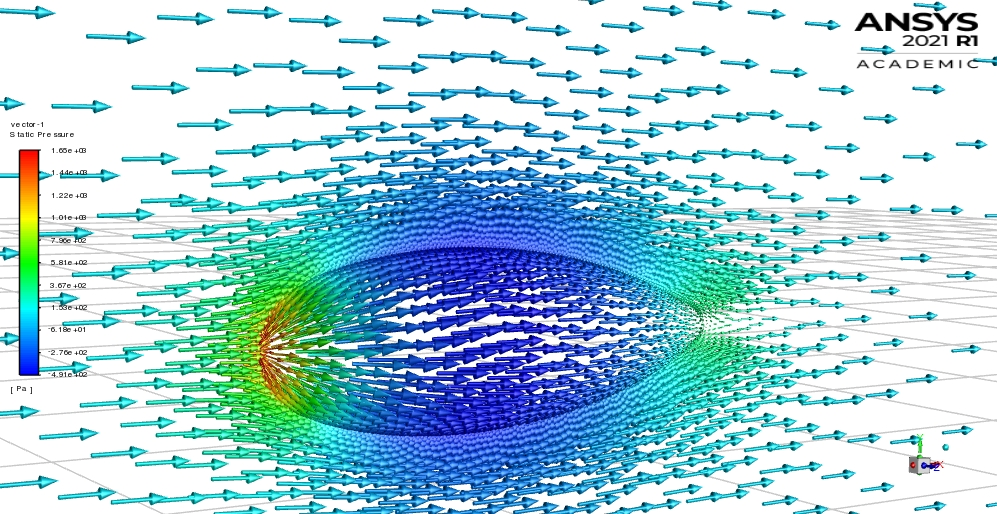